In [61]:
from skimage.color import rgb2gray
import skimage.transform
import scipy.ndimage as ndimage
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from skimage.io import imread
import skimage.exposure

In [85]:
def gaussian_filter(n_rows, n_cols, stdv):
    """
    Returns a 2d Gaussian image filter.
    """
    g_r = signal.windows.gaussian(n_rows, stdv)
    g_c = signal.windows.gaussian(n_cols, stdv)

    G = np.outer(g_r, g_c)

    return G/np.sum(G)

def PSNR(f,g):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))

In [100]:
plt.gray() # makes image plots grayscale

lena = rgb2gray(imread('lena.tiff'))
lena.astype(np.float64)
cameraman = imread('cameraman.tif').astype(np.float64) / 255

h1 = (1/6)*np.ones((1,6))
h2 = h1.T
h3 = np.array([[-1, 1]])
# print((lena[0][0]))

results = [signal.convolve2d(lena, h1), signal.convolve2d(lena, h2), signal.convolve2d(lena, h3)]  # convolution is commutative (order does not matter)

<Figure size 640x480 with 0 Axes>

In [36]:
h3

array([[-1,  1]])

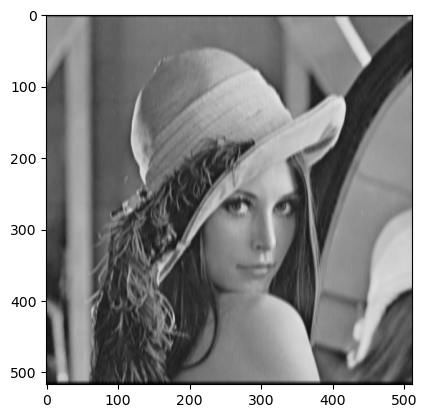

In [27]:
plt.imshow(results[1], vmin=0, vmax=1)  #vmin and vmax shift scales the lowest observed values to all the way to 0 (e.g. if lowest intensity of the image is 4, this will be mapped to 0. same with the highest intensity will be mapped to 1)

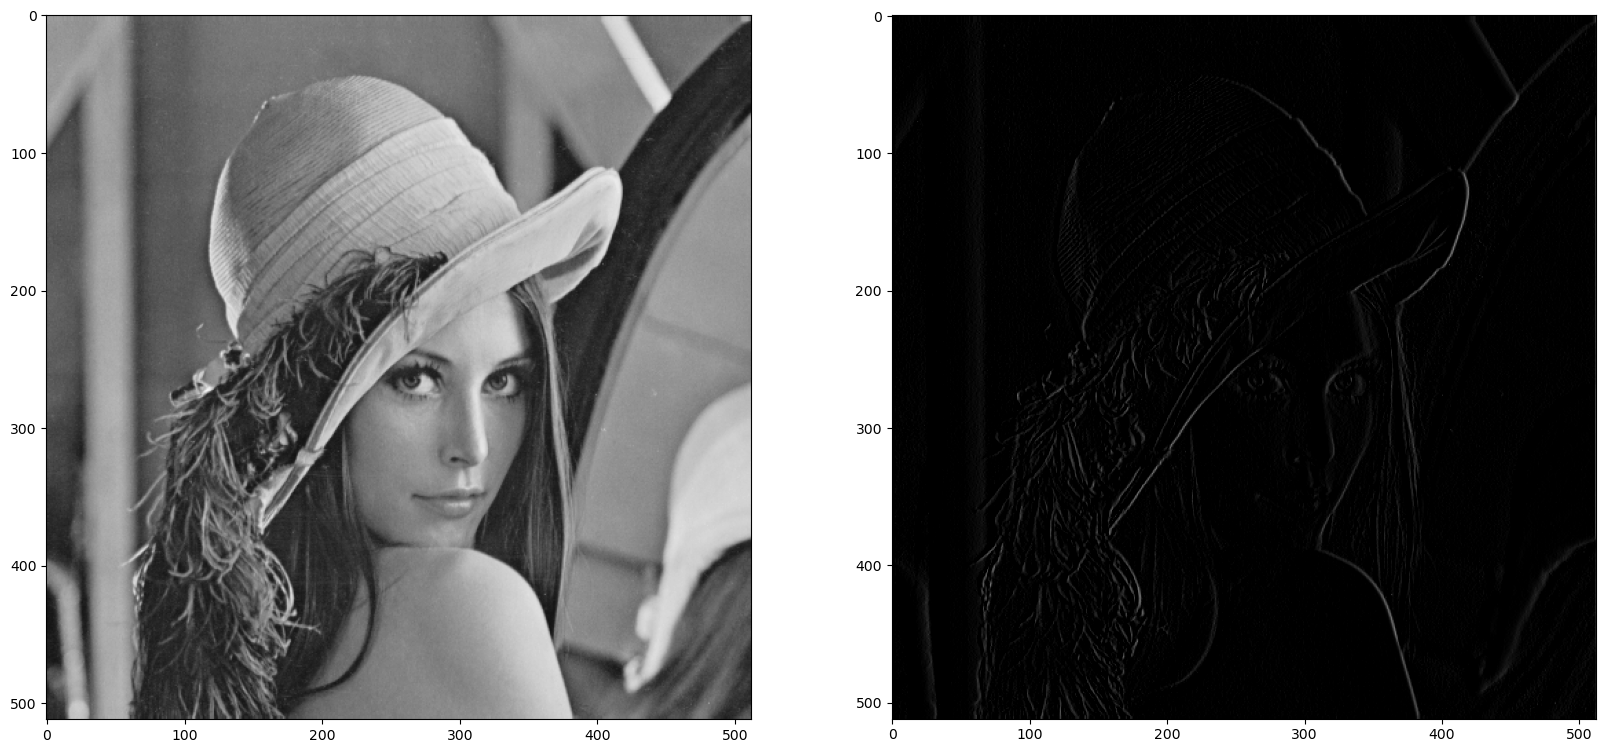

In [41]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(lena, vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.imshow(results[2], vmin=0, vmax=1)  # h1 transformation

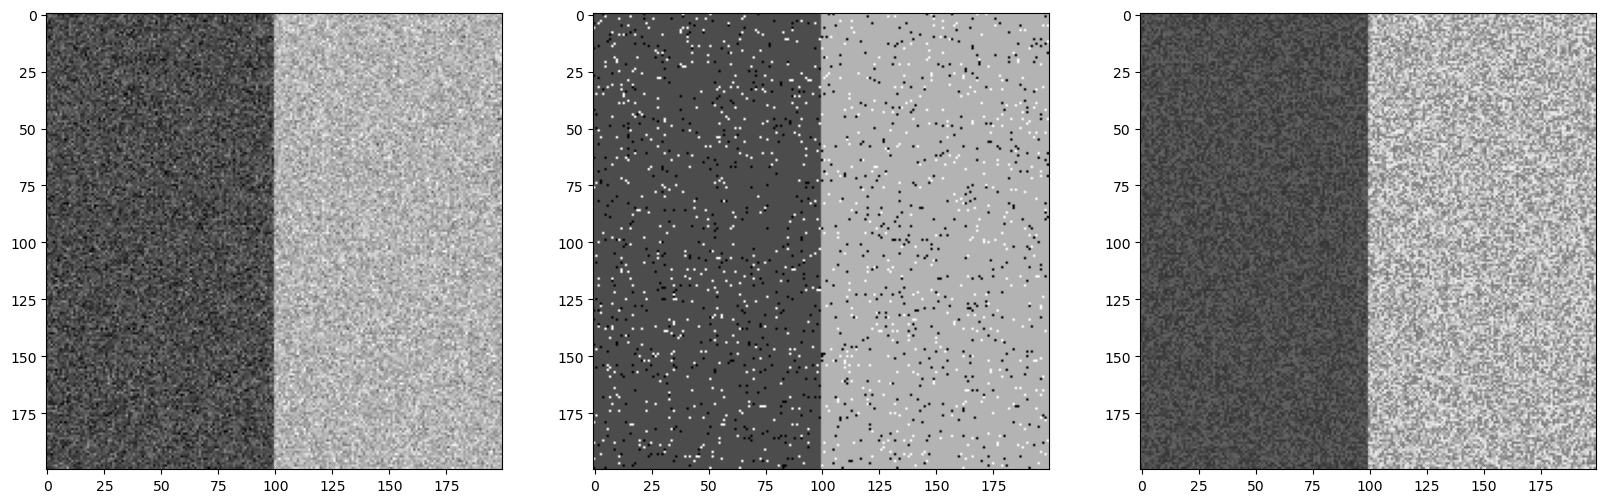

In [42]:
# 3 - Noise Generation
f = np.hstack([0.3*np.ones((200,100)), 0.7*np.ones((200,100))])  # toy image generation || np.hstack = Stack arrays in sequence horizontally (column wise).


def imnoise_speckle(im, v):
    # im: input image
    # v: variance
    n = np.sqrt(v*12) * (np.random.rand(f.shape[0], f.shape[1]) - 0.5)
    return im + im * n

images_to_display = []

# Zero-mean Gaussian (variance = 0.01)
gaussian_output = skimage.util.random_noise(f, mode="gaussian", mean=0, var=0.01)  #specified (default) parameters for clarity
images_to_display.append(gaussian_output)

# Salt & Pepper (noise density = 0.05)
sp_output = skimage.util.random_noise(f, mode="s&p", amount=0.05)
images_to_display.append(sp_output)

# Multiplicaive Speckle Noise (variance = 0.04)
speckle_output = imnoise_speckle(f, 0.04)
images_to_display.append(speckle_output)

fig = plt.figure(figsize=(20, 10))
for i in range(len(images_to_display)):
    plt.subplot(1, len(images_to_display), i+1)
    plt.imshow(images_to_display[i], vmin=0, vmax=1)

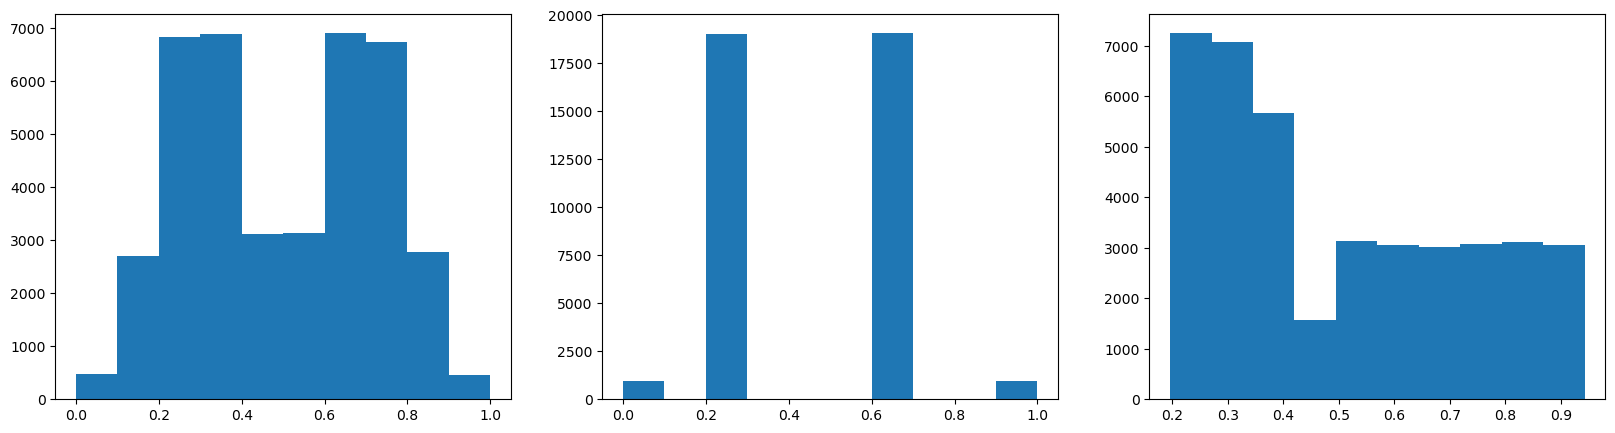

In [51]:
hist_to_display = []
gaussian_hist = gaussian_output.flatten()
hist_to_display.append(gaussian_hist)

sp_hist = sp_output.flatten()
hist_to_display.append(sp_hist)

speckle_hist = speckle_output.flatten()
hist_to_display.append(speckle_hist)

hists = plt.figure(figsize=(20, 5))
for i in range(len(hist_to_display)):
    plt.subplot(1, len(hist_to_display), i+1)
    plt.hist(hist_to_display[i])



(array([ 5180., 29569., 28699., 36976., 46417., 50992., 32433., 19913.,
        11036.,   929.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

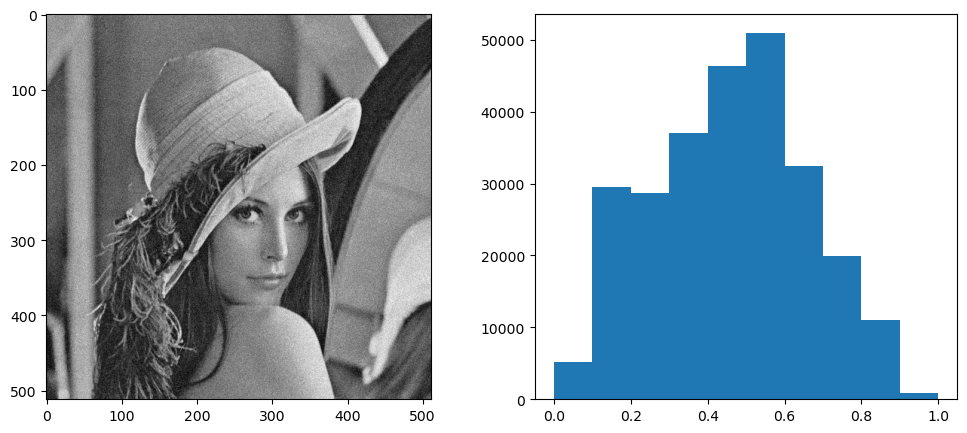

In [55]:
# 4 - Noise Reduction in the Spatial Domain

lena_gaussian_noise = skimage.util.random_noise(lena, mode="gaussian", mean=0, var=0.002)  #specified (default) parameters for clarity
lena_gaussian_hist = lena_gaussian_noise.flatten()

# > Plotting Lena gaussian noise + histogram
lena_noises = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(lena_gaussian_noise, vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.hist(lena_gaussian_hist)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


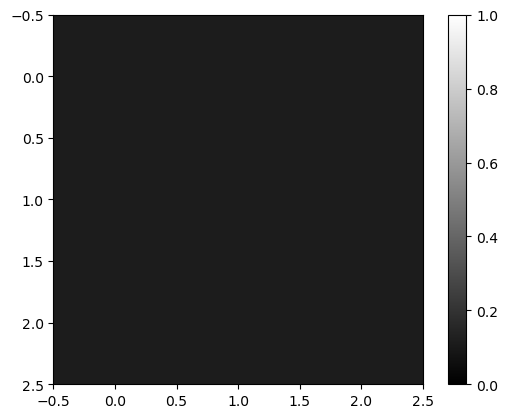

In [64]:
averaging_filter = np.ones((3, 3)) / (3.0 * 3.0)
print(averaging_filter)
plt.imshow(averaging_filter, vmin=0, vmax=1)
plt.colorbar()

31.62011728237932

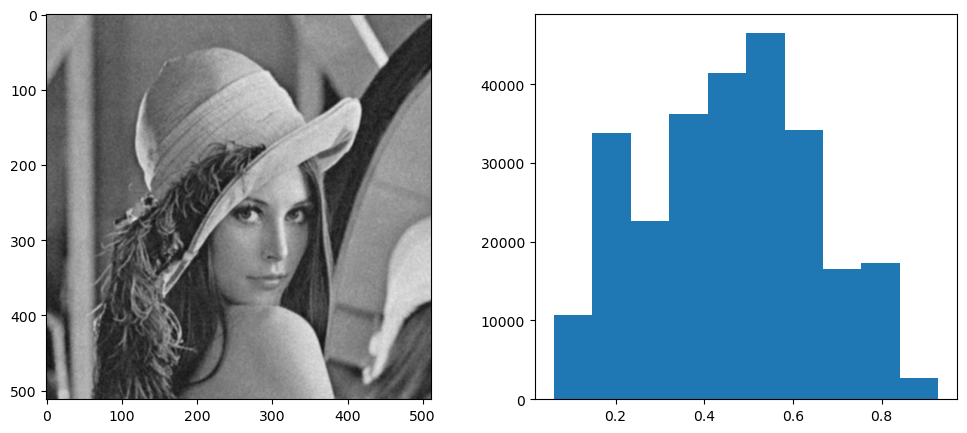

In [68]:
# 3X3 Averaging Filter Kernel
result = ndimage.convolve(lena_gaussian_noise, averaging_filter)
result_hist = result.flatten()

results = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(result, vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.hist(result_hist)

PSNR(lena, result)

27.063346970998104

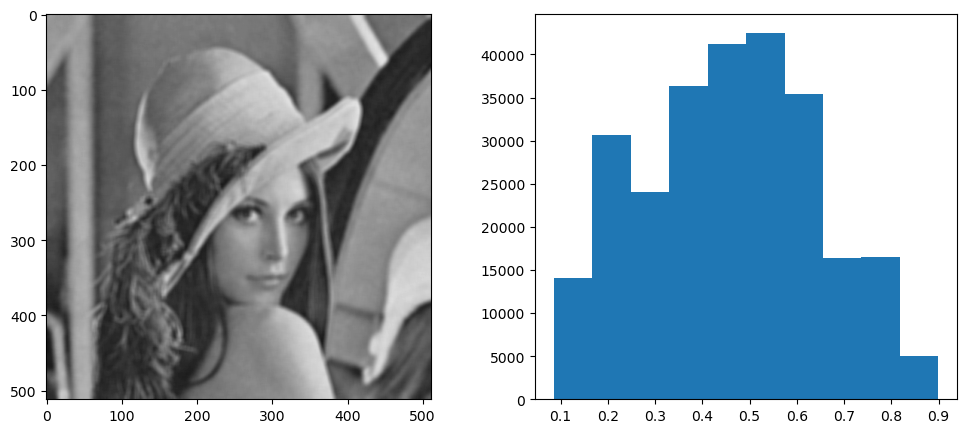

In [69]:
# 7x7 Averaging Filter Kernel
averaging_filter = np.ones((7, 7)) / (7.0 * 7.0)
result = ndimage.convolve(lena_gaussian_noise, averaging_filter)
result_hist = result.flatten()

results = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(result, vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.hist(result_hist)

PSNR(lena, result)

31.62342976762625

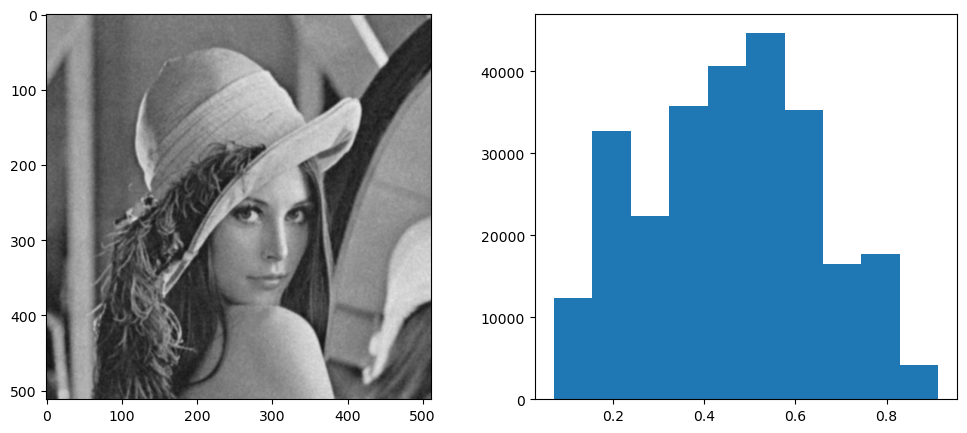

In [70]:
# 7x7 Gaussian Filter Kernel
gaussian_filter = gaussian_filter(7, 7, 1)
result = ndimage.convolve(lena_gaussian_noise, gaussian_filter)
result_hist = result.flatten()

results = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(result, vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.hist(result_hist)

PSNR(lena, result)

7x7 Average Filter: 26.136588572690016
7x7 Gaussian Filter: 27.311663101736137


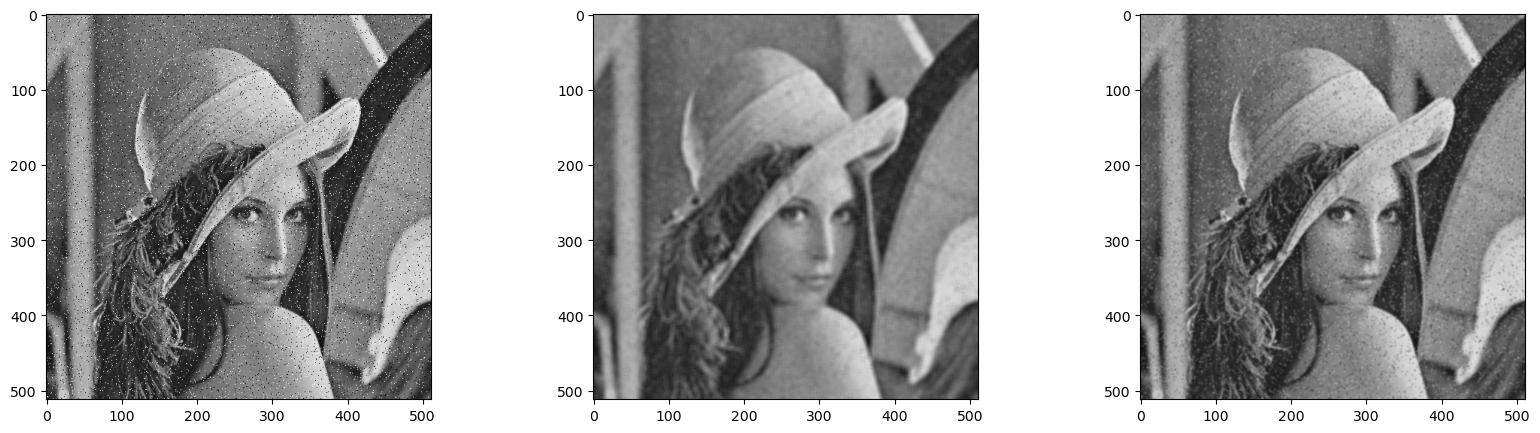

In [111]:
# 7x7 Gaussian Filter Kernel
filters_images_to_display = []

# New Salt and Pepper Image
lena_sp_output = skimage.util.random_noise(lena, mode="s&p", amount=0.05)
filters_images_to_display.append(lena_sp_output)

# Filters
averaging_filter = np.ones((7, 7)) / (7.0 * 7.0)
lena_gaussian_filter = gaussian_filter(7, 7, 1)


# Average Filter Convolved
lena_avg__sp_fix = ndimage.convolve(lena_sp_output, averaging_filter)
filters_images_to_display.append(lena_avg__sp_fix)
print("7x7 Average Filter: " + str(PSNR(lena, lena_avg__sp_fix)))

# Gaussian Filter Convolved
lena_gaus__sp_fix = ndimage.convolve(lena_sp_output, lena_gaussian_filter)
filters_images_to_display.append(lena_gaus__sp_fix)
print("7x7 Gaussian Filter: " + str(PSNR(lena, lena_gaus__sp_fix)))

lena_filter_fixes = plt.figure(figsize=(20, 5))
for i in range(len(filters_images_to_display)):
    plt.subplot(1, len(filters_images_to_display), i+1)
    plt.imshow(filters_images_to_display[i], vmin=0, vmax=1)

(array([11424., 29599., 25366., 35673., 42877., 45005., 34779., 17942.,
        15925.,  3554.]),
 array([0.07553284, 0.15907977, 0.24262669, 0.32617362, 0.40972055,
        0.49326747, 0.5768144 , 0.66036132, 0.74390825, 0.82745517,
        0.9110021 ]),
 <BarContainer object of 10 artists>)

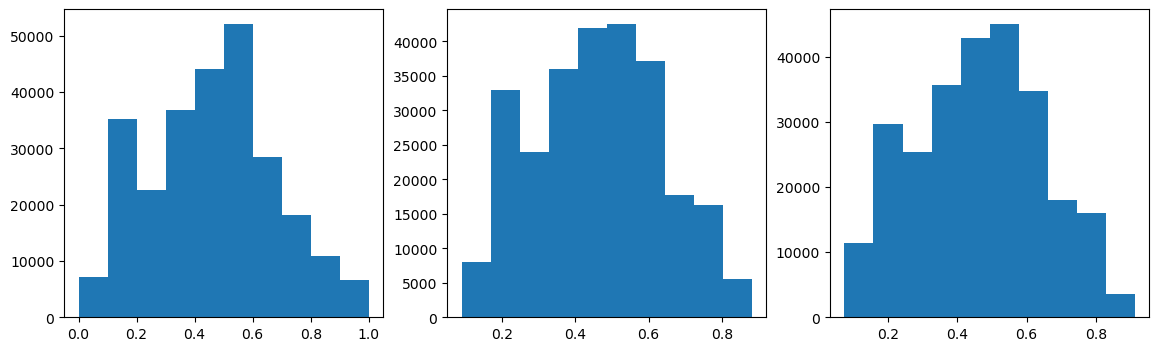

In [132]:
lena_sp_hist = lena_sp_output.flatten()
lena_avg_hist = lena_avg__sp_fix.flatten()
lena_gaus_hist = lena_gaus__sp_fix.flatten()

lena_filter_hists = plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.hist(lena_sp_hist)

plt.subplot(1, 3, 2)
plt.hist(lena_avg_hist)

plt.subplot(1, 3, 3)
plt.hist(lena_gaus_hist)



In [79]:
lena_sp_output = skimage.util.random_noise(lena, mode="s&p", amount=0.05)

34.26991058492233

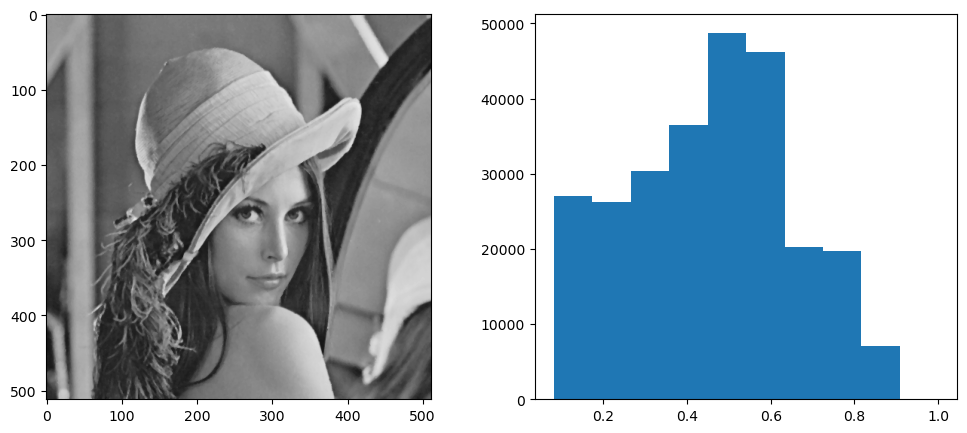

In [89]:
result = ndimage.median_filter(lena_sp_output, size=(3, 3))
result_hist = result.flatten()

results = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(result, vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.hist(result_hist)

PSNR(lena, result)

# Section 5 - Sharpening in Spatial Domain (cameraman)

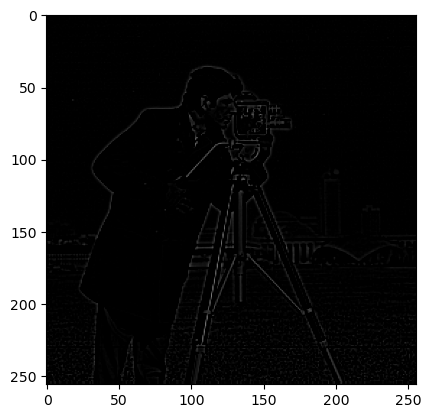

In [120]:
gf = gaussian_filter(7, 7, 1)
filtered_camerman = ndimage.convolve(cameraman, gf)
subtracted = cameraman - filtered_camerman
plt.imshow(subtracted, vmax=1, vmin=0)

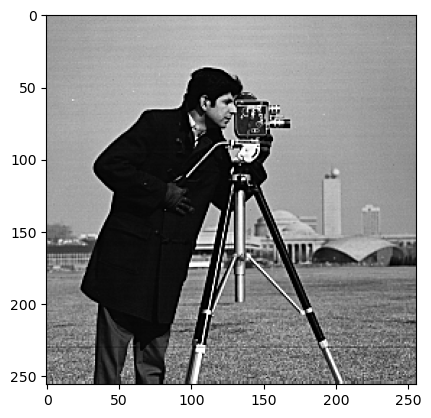

In [121]:
result_add = cameraman + subtracted
plt.imshow(result_add, vmax=1, vmin=0)

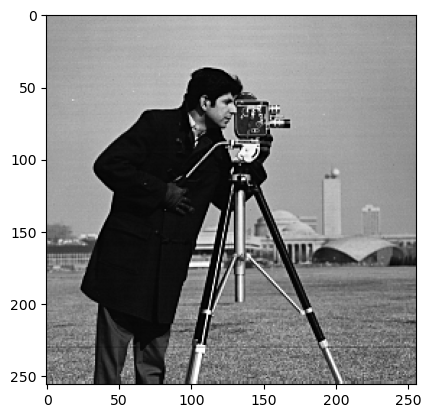

In [122]:
result_mul = cameraman + 0.5 * subtracted
plt.imshow(result_mul, vmax=1, vmin=0)